# Getting Collocates for Words

This shows how you can get collocates for a word. 

**Note:** It assumes you have the text in the same directory.

### Checking files and getting a text

First we check what texts we have in the directory.

In [1]:
%ls *.txt

Hume Enquiry.txt   Hume Treatise.txt  untitled.txt


Now we open the text. 

Copy in the title of the text you want to process and run the next <a href="Glossary.ipynb#cell" title="An input strucutre in a Notebook which runs either Markdown or Python code" >cell. </a> Our example uses the <a href="Glossary.ipynb#plaintexts" title="Text which includes only data related to the readable material." >plain text </a> version of Hume's [A Treatise of Human Nature by David Hume](http://www.gutenberg.org/ebooks/4705) that we downloaded.

In [1]:
targetText = "Hume Treatise.txt"

with open(targetText, "r") as f:
    theText = f.read()

print("This string has", "{:,}".format(len(theText)), "characters")

This string has 1,344,061 characters


### Tokenizing

Note that we are tokenizing the full Gutenberg text file which includes metadata and license information. If you want only the tokens of the book you should delete the Gutenberg information from the text file.

In [34]:
import re
theTokens = re.findall(r'\b\w[\w-]*\b', theText.lower())
print(theTokens[:10])

['the', 'project', 'gutenberg', 'ebook', 'of', 'a', 'treatise', 'of', 'human', 'nature']


### Finding the collocates

This will ask you what word you want collocates for, and create a list of collocates. Note that you can set the number of words of context.

In [37]:
wrd2find = input("What word do you want collocates for?") # Ask for the word to search for
context = 5 # This sets the context of words on either side to grab

end = len(theTokens)
counter = 0
theCollocates = []
for word in theTokens:
    if word == wrd2find: # This checks to see if the word is what we want
        for i in range(context):
            if (counter - (i + 1)) >= 0: # This checks that we aren't at the beginning
                theCollocates.append(theTokens[(counter - (i + 1))]) # This adds words before
            if (counter + (i + 1)) < end: # This checks that we aren't at the end
                theCollocates.append(theTokens[(counter + (i + 1))]) # This adds words afte
    counter = counter + 1
    
print(theCollocates[:10])

What word do you want collocates for?gutenberg
['project', 'ebook', 'the', 'of', 'a', 'treatise', 'of', 'project', 'license', 'the']


### Doing things with the collocates

Now we can do various things with the list of collocates.

#### Count collocates

In [38]:
print(len(theCollocates))

357


#### Count unique words among collocates

In [40]:
print(set(theCollocates))

123


#### Tabulate top collocates

In [56]:
import nltk
tokenDist = nltk.FreqDist(theCollocates)
tokenDist.tabulate(10)

   project        the foundation   literary    archive         of         to          1          a       with 
        33         31         15         14         14         12         10          9          8          8 


#### Plot top collocates

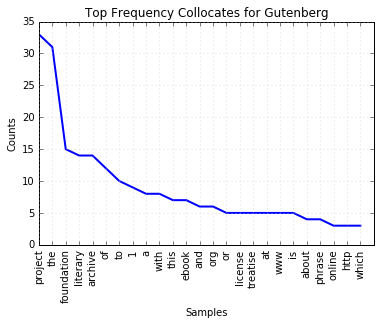

In [46]:
import matplotlib
%matplotlib inline
tokenDist.plot(25, title="Top Frequency Collocates for " + wrd2find.capitalize())

#### Explort all collocates and counts as a CSV

This will create CSV file with the name of the target word with the counts.

In [1]:
import csv
nameOfResults = wrd2find.capitalize() + ".Collocates.csv"
table = tokenDist.most_common()

with open(nameOfResults, "w") as f:
    writer = csv.writer(f)
    writer.writerows(table)
    
print("Done")

NameError: name 'wrd2find' is not defined

## Next Steps

In the next utility example we will generate [Concordances](Concordances.ipynb) for a target word.

---
[CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/) From [The Art of Literary Text Analysis](../ArtOfLiteraryTextAnalysis.ipynb) by [Stéfan Sinclair](http://stefansinclair.name) &amp; [Geoffrey Rockwell](http://geoffreyrockwell.com). Edited and revised by [Melissa Mony](http://melissamony.com). <br >Created August 8, 2014  (Jupyter 4.2.1)